In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score #root_mean_squared_error
from sklearn.datasets import fetch_california_housing

warnings.filterwarnings('ignore')
print('Modules Loaded Successfully!!')

Modules Loaded Successfully!!


In [5]:
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
df = pd.DataFrame(data_dict['data'],
                  columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']


print('Data Loaded Successfully!!')

Data Loaded Successfully!!


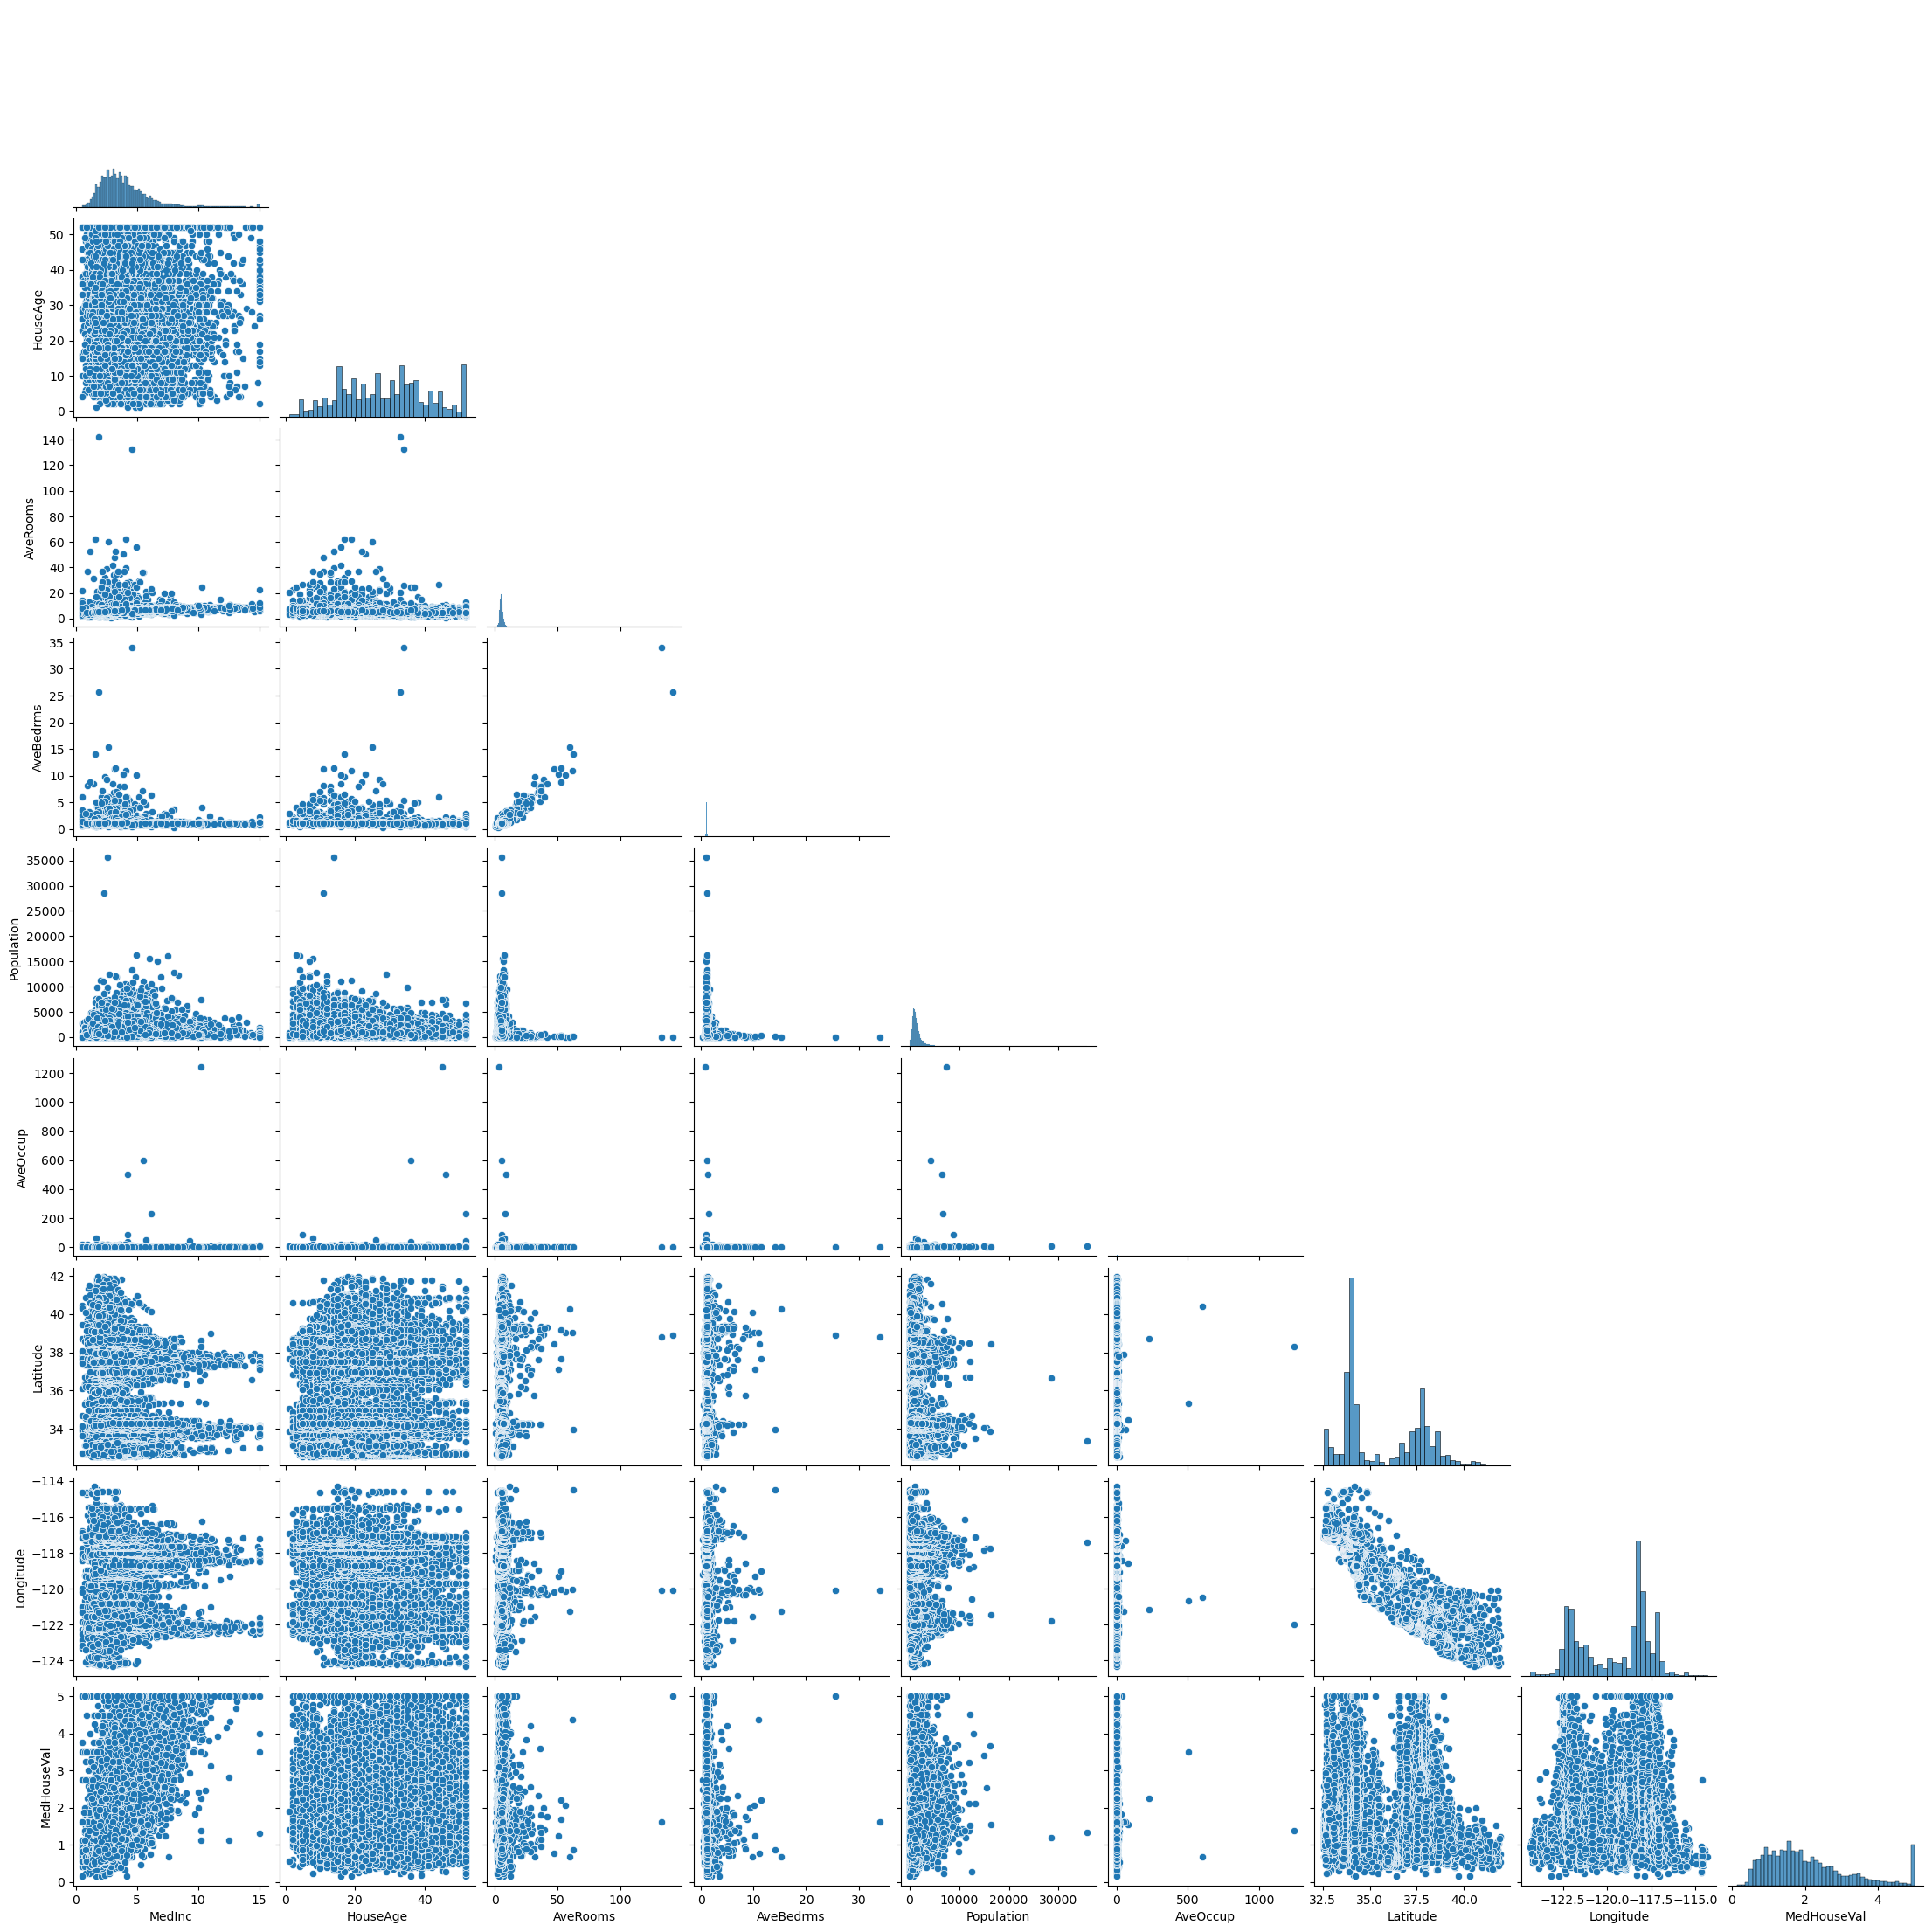

In [7]:
sns.pairplot(data = df,corner=True)
plt.show()

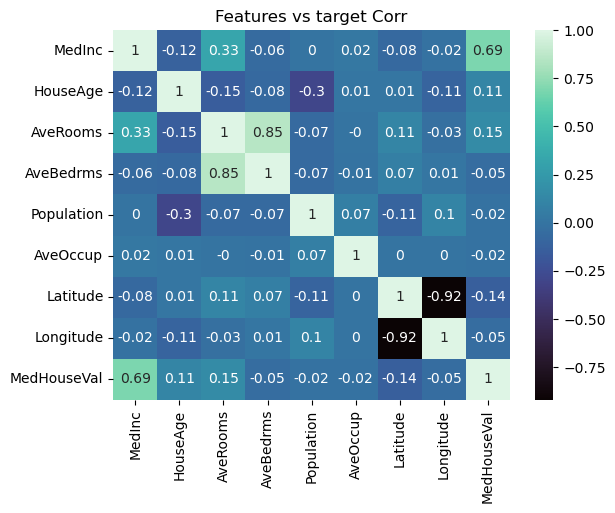

In [8]:
plt.title('Features vs target Corr')
sns.heatmap(df.corr().round(2), annot = True,cmap = 'mako')
# cmap = color_map ( -1 to 1)
plt.show()

In [9]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


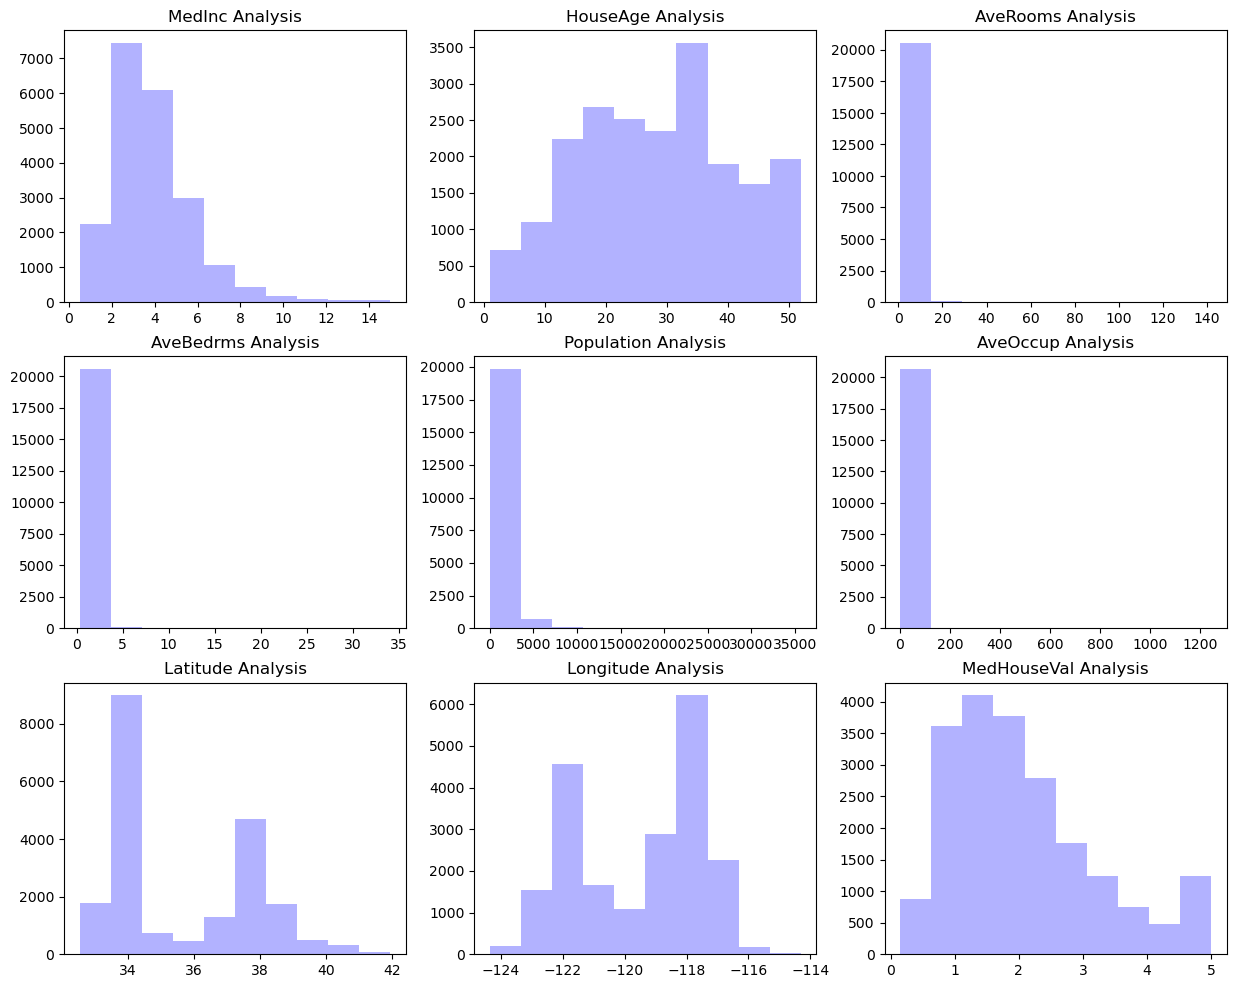

In [10]:
plt.figure(figsize = (15,12))
for i,j in enumerate(df.columns):
  plt.subplot(3,3, i+1)
  plt.hist(df[j],color = 'blue', alpha = 0.3)
  plt.title(j+' Analysis')
plt.show()

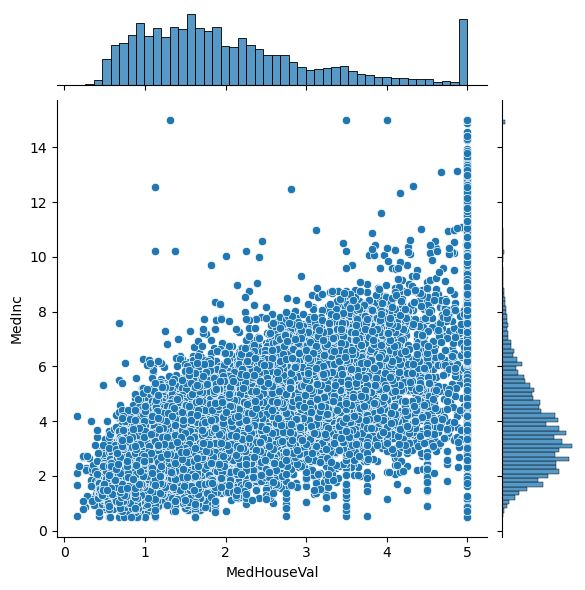

In [11]:
sns.jointplot(data = df, x = 'MedHouseVal', y = 'MedInc')
plt.show()

In [15]:
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:,:-1]
y = df['MedHouseVal']



scaler = MinMaxScaler()

scaler.fit(X)  # Learning: Fit data in 0 to 1
X_scaled = scaler.transform(X)

print('Done')


Done


In [16]:
print(X_scaled.min())
print(X_scaled.max())

0.0
1.0000000000000002


In [17]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=.2, random_state= 150 )
print('Done')

Done


In [18]:
b,a,c,d = [23,534,6,65] # Unpacking
print(a)

534


In [19]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression() # Object Creation

lr_model.fit(X_train,y_train) # Trainig Model

LinearRegression()

In [20]:
y_pred = lr_model.predict(X_test)
print('Done')

Done


In [21]:
lr_compare_df = pd.DataFrame({'Actual House price':y_test,
             'Predicted House price':y_pred})

print('Done')

Done


In [22]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

Lr MAE 0.5295622016018944


In [23]:
# Trainig Score
lr_train_score = lr_model.score(X_train,y_train)
print('Training Score',lr_train_score)

# testing Score
lr_test_score = lr_model.score(X_test,y_test)
print('testing Score',lr_test_score)

Training Score 0.6081032361747606
testing Score 0.5984024263886711


In [24]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names'])
X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1272,0.142246,0.666667,0.043385,0.0273,0.005325,0.002075,0.575983,0.315737


In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X_train_df['intercept']  = 1

X_train_df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,intercept
4011,0.05953,0.529412,0.028397,0.022802,0.033409,0.001633,0.697131,0.277888,1


In [27]:
col = list(X.columns)
col.remove('Latitude')

# print(col)

X_train_vif = X_train_df[col]
X_train_vif.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Longitude
1632,0.333816,0.823529,0.036679,0.019163,0.018835,0.001642,0.589641


In [28]:
def built_model(ml_model, col):

    new_X_train = pd.DataFrame(X_train,columns = data_dict['feature_names'])
    final_X_train = new_X_train[col]

    new_X_test = pd.DataFrame(X_test,columns = data_dict['feature_names'])
    final_X_test = new_X_test[col]

    machine_model = ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred = machine_model.predict(final_X_test)

    model_train_score = machine_model.score(final_X_train,y_train)
    model_test_score = machine_model.score(final_X_test,y_test)

    model_mae_error = mean_absolute_error(y_test,model_y_pred)
    model_mse_error = mean_squared_error(y_test,model_y_pred)
    model_rmse_error = model_mse_error**.5
    model_r2_score = r2_score(y_test,model_y_pred)

    model_metrics = {'Model Training Score':model_train_score,
                    'Model Test Score':model_test_score,
                    'MAE Error':model_mae_error,
                    'MSE Error':model_mse_error,
                    'RMSE Error':model_rmse_error,
                    'R2 Score':model_r2_score}

    model_matrix = pd.DataFrame(model_metrics,index = [1])

    return model_matrix,machine_model


In [29]:
ml_model = LinearRegression

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.543073,0.531162,0.570342,0.621327,0.788243,0.531162


In [30]:
from sklearn.linear_model import Lasso, Ridge

In [31]:
ml_model = Lasso
# Lasso regression not giving much score, we can reject this model
built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.0,-0.000009,0.904335,1.325262,1.1512,-0.000009


In [32]:
ml_model = Ridge

built_model(ml_model,col)[0]

,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.52581,0.513927,0.59007,0.644168,0.802601,0.513927


In [33]:
col = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [34]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
  i += 1

  temp_df,final_model = built_model(Ridge,col)
  score = temp_df['Model Test Score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)

    display(temp_df)
    break

  display(clear=True)

Score is: 0.6067450510265389
Best random State 178


,Model Training Score,Model Test Score,MAE Error,MSE Error,RMSE Error,R2 Score
1,0.531671,0.606745,0.550302,0.556391,0.745916,0.606745


In [35]:
final_model

Ridge()

In [36]:
#pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [41]:
import streamlit as st

In [44]:
!streamlit run untitled1.py

^C


In [46]:
import os

In [47]:
os.getcwd()

'C:\\Users\\paras'

In [48]:
col

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467
...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209


In [50]:
df.to_csv('california.csv')
print('done')

done


In [52]:
for i in df[col]:
    min_value,max_value =df[i].agg(['min','max'])
    print('min',i,min_value)
    print('max',i,max_value)
    

min MedInc 0.4999
max MedInc 15.0001
min HouseAge 1.0
max HouseAge 52.0
min AveRooms 0.8461538461538461
max AveRooms 141.9090909090909
min AveBedrms 0.3333333333333333
max AveBedrms 34.06666666666667
min Population 3.0
max Population 35682.0
min AveOccup 0.6923076923076923
max AveOccup 1243.3333333333333


In [53]:
temp_df=pd.read_csv('california.csv')
for i in temp_df[col]:
    min_value,max_value=df[i].agg(['min','max'])

In [54]:
import pickle

with open('house_price_pred_ridge_model.pkl','wb') as f:
    pickle.dump(final_model,f)

with open('sc_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and Scaller Saved Successfully!!')

ML model and Scaller Saved Successfully!!


In [55]:
#step 9
#import streamlit as st
#*import pandas as pd
#import random
#*from sklearn.preprocessing import StandardScaler
#import pickle
#import time


In [56]:
#github: folder housing price project
#requirements.txt=we will write those modules which is important for app.py to 


In [57]:
pd.__version__


'2.2.3'

In [58]:
st.__version__

'1.45.1'

In [60]:
sklearn.__version__

NameError: name 'sklearn' is not defined